In [26]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

path_data = "../data/red-wine-quality-cortez-et-al-2009/winequality-red.csv"
df1 = pd.read_csv(path_data)

In [4]:
# qualityのvalue counts
countv = df1.quality.value_counts()
print(countv)
print("-"*24)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64
------------------------


For fixed acidity


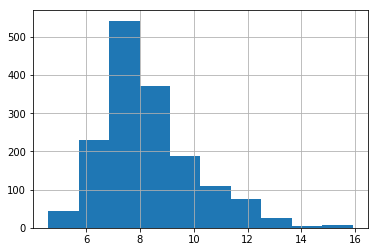

------------------------
For volatile acidity


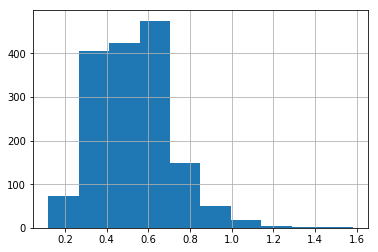

------------------------
For citric acid


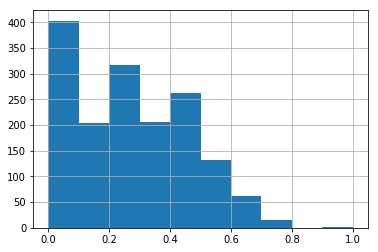

------------------------
For residual sugar


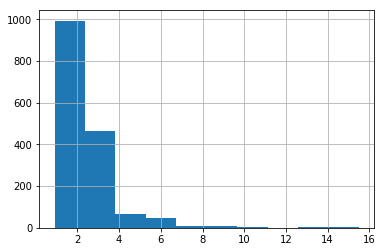

------------------------
For chlorides


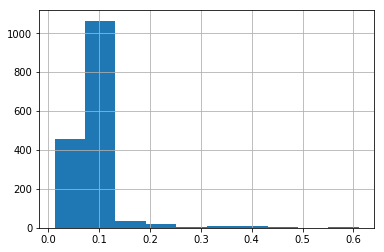

------------------------
For free sulfur dioxide


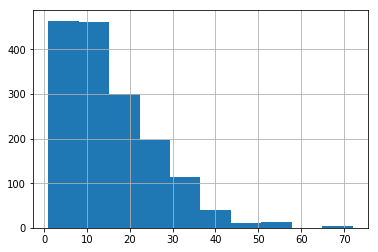

------------------------
For total sulfur dioxide


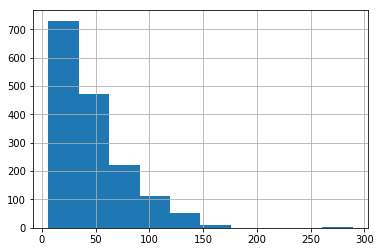

------------------------
For density


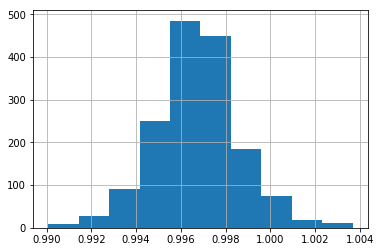

------------------------
For pH


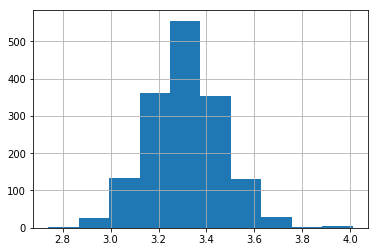

------------------------
For sulphates


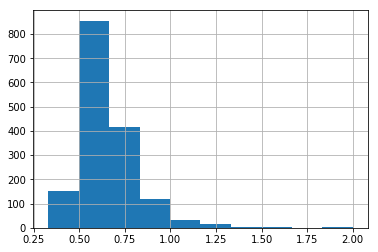

------------------------
For alcohol


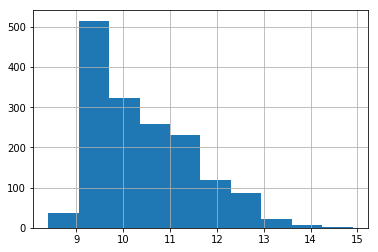

------------------------
For quality


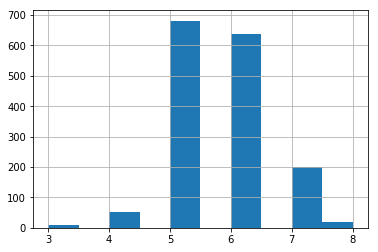

------------------------


In [6]:
# 各値のhistgram
for i in df1.columns:
    print("For {}".format(i))
    df1.loc[:, i].hist()
    plt.show()
    plt.close()
    print("-"*24)

For fixed acidity


/home/tomoaki_hori/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


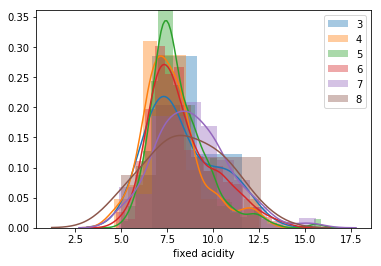

------------------------
For volatile acidity


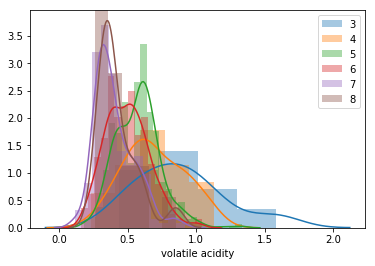

------------------------
For citric acid


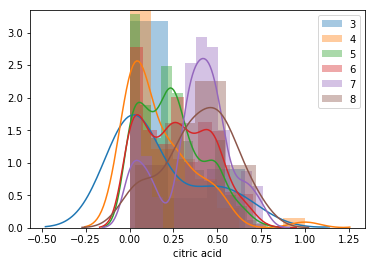

------------------------
For residual sugar


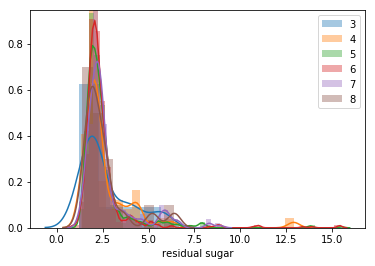

------------------------
For chlorides


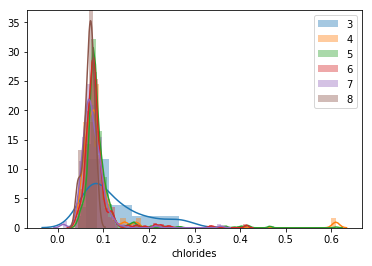

------------------------
For free sulfur dioxide


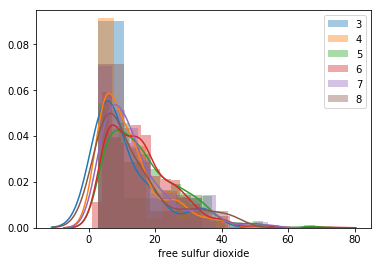

------------------------
For total sulfur dioxide


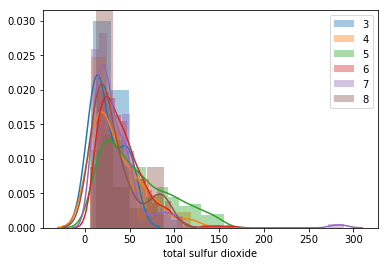

------------------------
For density


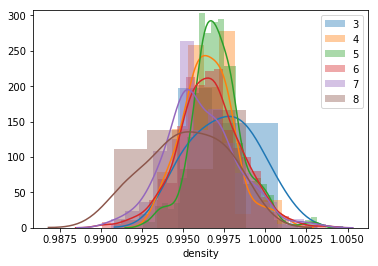

------------------------
For pH


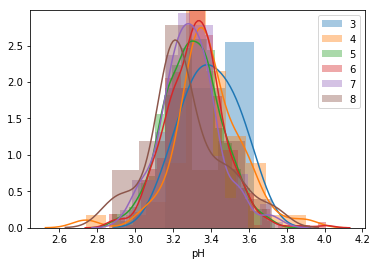

------------------------
For sulphates


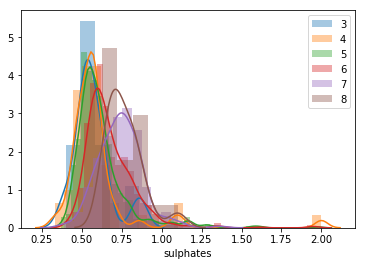

------------------------
For alcohol


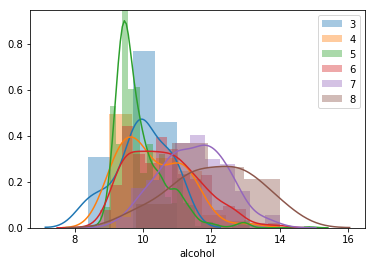

------------------------
For quality


/home/tomoaki_hori/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/tomoaki_hori/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/tomoaki_hori/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


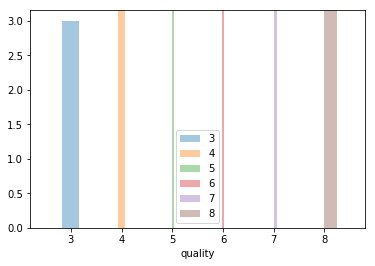

------------------------


In [15]:
# 各値のviolinplot: quality別に 
for i in df1.columns:
    print("For {}".format(i))
    for qi in df1.quality.sort_values().unique():
        posi = df1.quality==qi
        pli = sns.distplot(df1.loc[posi, i], label=str(qi))
    plt.legend()
    plt.show()
    plt.close()
    print("-"*24)
    

In [16]:
df1.loc[df1.sulphates>1.8, :]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
86             8.6              0.49         0.28             1.9       0.11   
91             8.6              0.49         0.28             1.9       0.11   
92             8.6              0.49         0.29             2.0       0.11   
151            9.2              0.52         1.00             3.4       0.61   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
86                  20.0                 136.0   0.9972  2.93       1.95   
91                  20.0                 136.0   0.9972  2.93       1.95   
92                  19.0                 133.0   0.9972  2.93       1.98   
151                 32.0                  69.0   0.9996  2.74       2.00   

     alcohol  quality  
86       9.9        6  
91       9.9        6  
92       9.8        5  
151      9.4        4

151番目は抜いても良い
pH以外は対数化したほうが良い

For fixed acidity


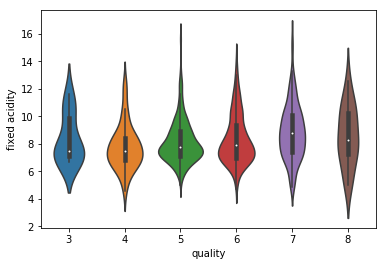

------------------------
For volatile acidity


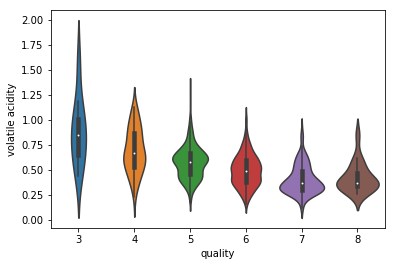

------------------------
For citric acid


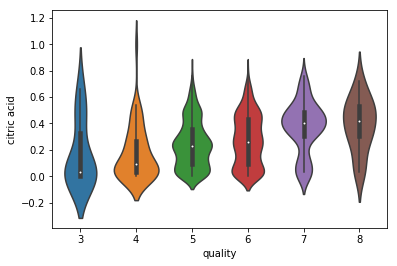

------------------------
For residual sugar


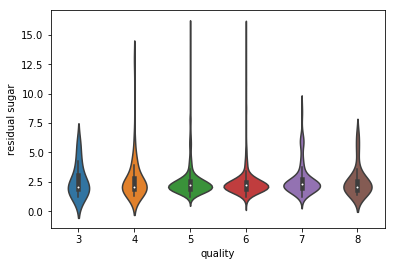

------------------------
For chlorides


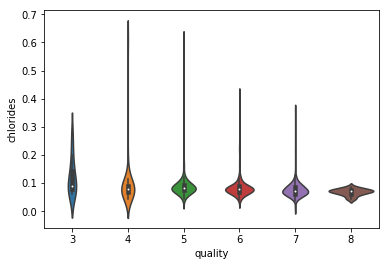

------------------------
For free sulfur dioxide


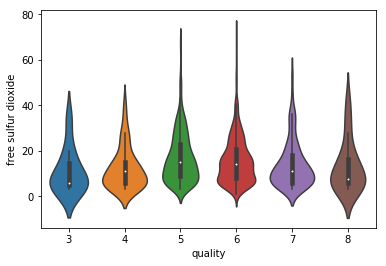

------------------------
For total sulfur dioxide


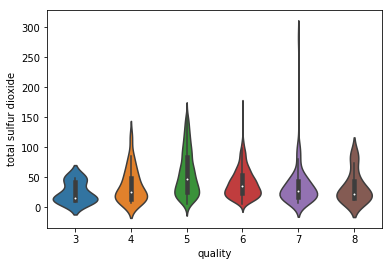

------------------------
For density


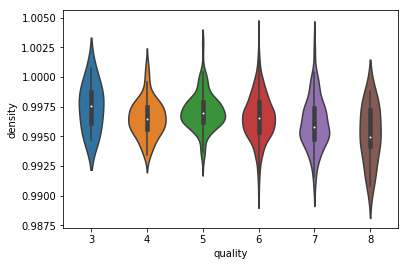

------------------------
For pH


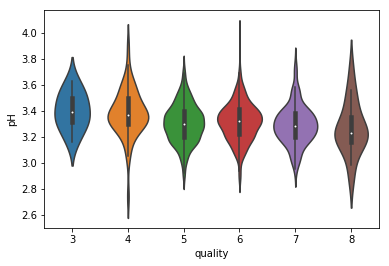

------------------------
For sulphates


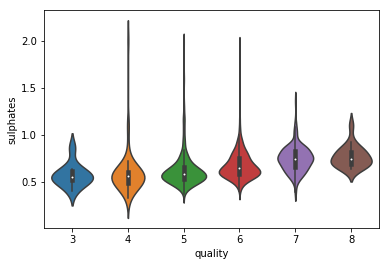

------------------------
For alcohol


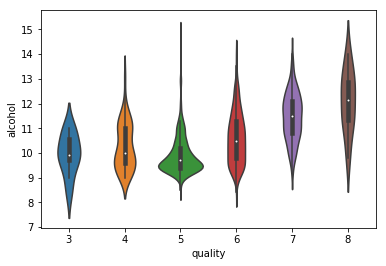

------------------------
For quality


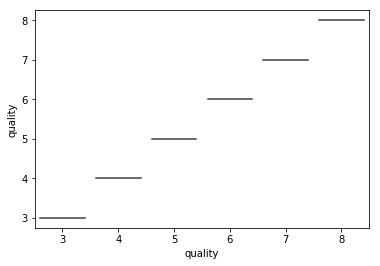

------------------------


In [8]:
# 各値のviolinplot: quality別に 
for i in df1.columns:
    print("For {}".format(i))
    pli = sns.violinplot(x="quality", y=i, data=df1)
    plt.show()
    plt.close()
    print("-"*24)

alcohol, sulphates, volatile acidity, volatile acidityあたりが重要？


AttributeError: 'PairGrid' object has no attribute 'show'

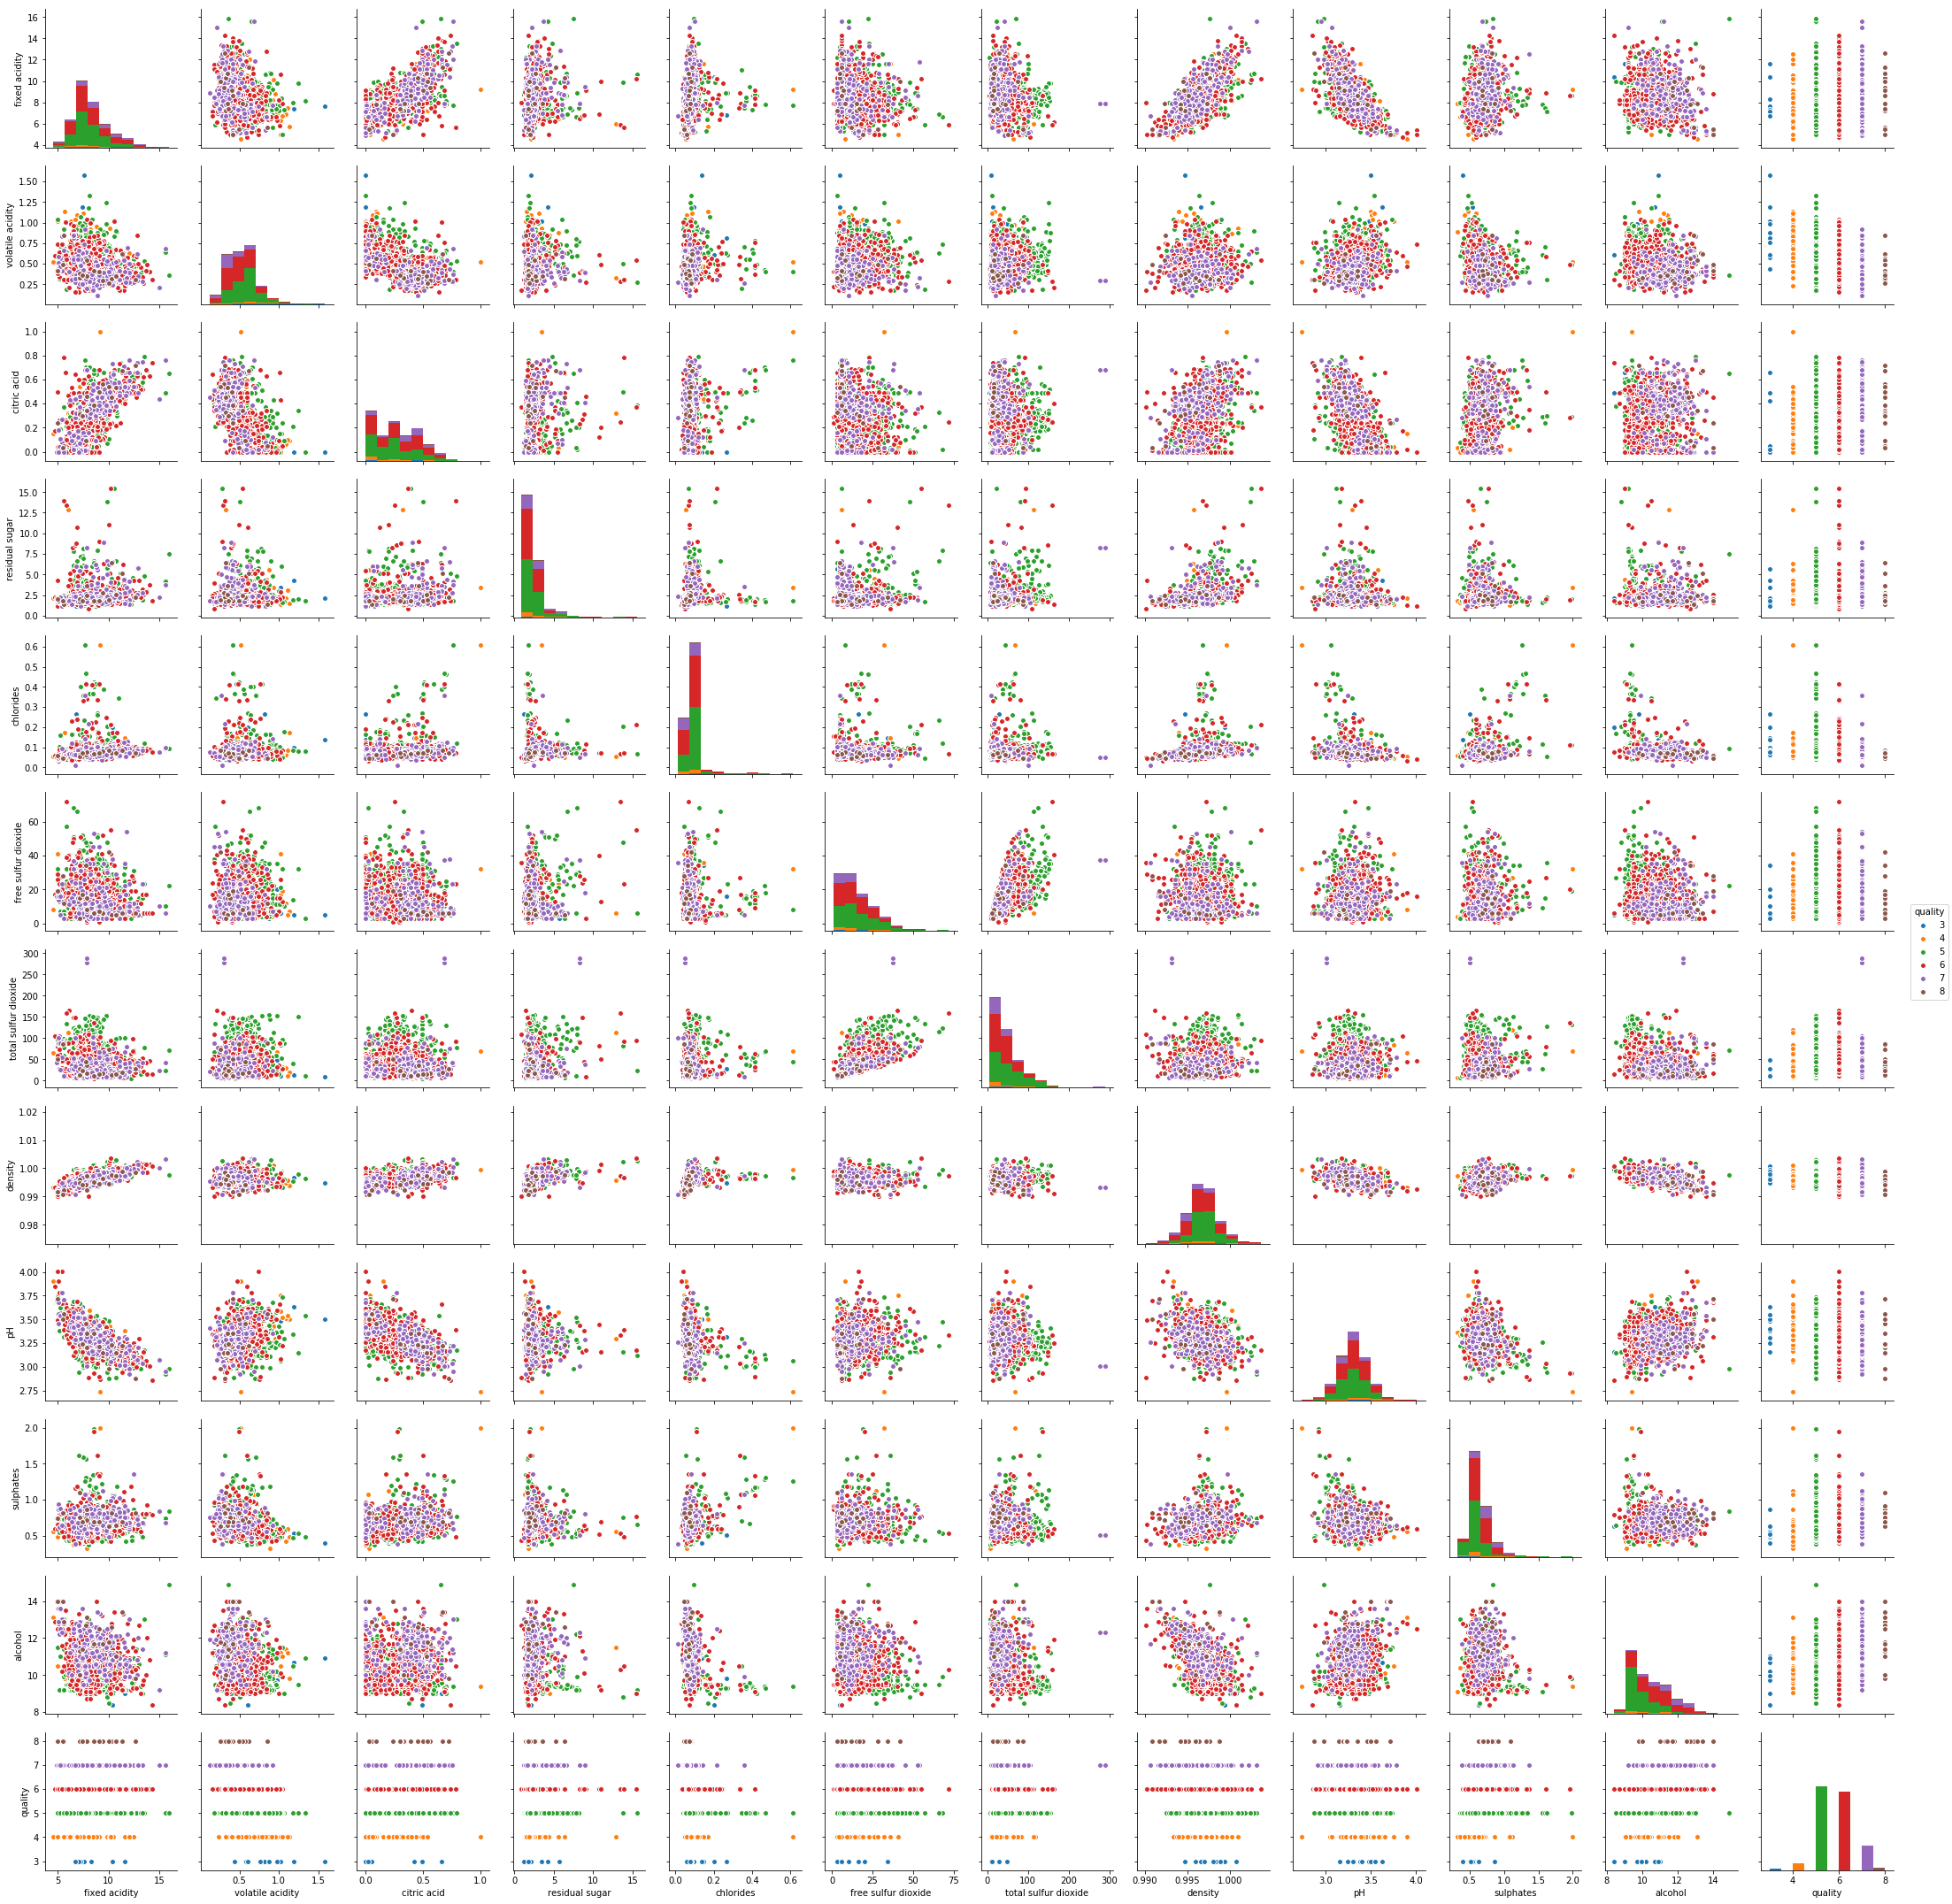

In [18]:
import itertools as itt

g = sns.pairplot(df1, hue="quality")

    


最後にpHとquality以外をlogにして、
1. pairplot
2. 主成分をとる

In [35]:
import numpy as np
df2 = df1.copy()
for i in df2.drop(['pH', "quality", "citric acid"], axis=1).columns:
    df2.loc[df2.loc[:, i]==0, i] = 10**(-9)
    df2.loc[:, i] = np.log(df2.loc[:, i].values)

In [36]:
df1.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [37]:
df2.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        2.098226         -0.698517     0.270976        0.850232   
std         0.199412          0.353683     0.194801        0.357443   
min         1.526056         -2.120264     0.000000       -0.105361   
25%         1.960095         -0.941609     0.090000        0.641854   
50%         2.066863         -0.653926     0.260000        0.788457   
75%         2.219203         -0.446287     0.420000        0.955511   
max         2.766319          0.457425     1.000000        2.740840   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean     -2.505462             2.546132              3.600721    -0.003260   
std       0.327215             0.685292              0.705393     0.001893   
min      -4.422849             0.000000              1.791759    -0.009980   
25%      -2.659260             1.945910              3.091042    -0.004410   
50%      -2.538307             2.639057              3.637586    -0.003255   
75%      -2.407946             3.044522              4.127134    -0.002167   
max      -0.492658             4.276666              5.666427     0.003683   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113    -0.445260     2.339021     5.636023  
std       0.154386     0.223566     0.098899     0.807569  
min       2.740000    -1.108663     2.128232     3.000000  
25%       3.210000    -0.597837     2.251292     5.000000  
50%       3.310000    -0.478036     2.322388     6.000000  
75%       3.400000    -0.314711     2.406945     6.000000  
max       4.010000     0.693147     2.701361     8.000000

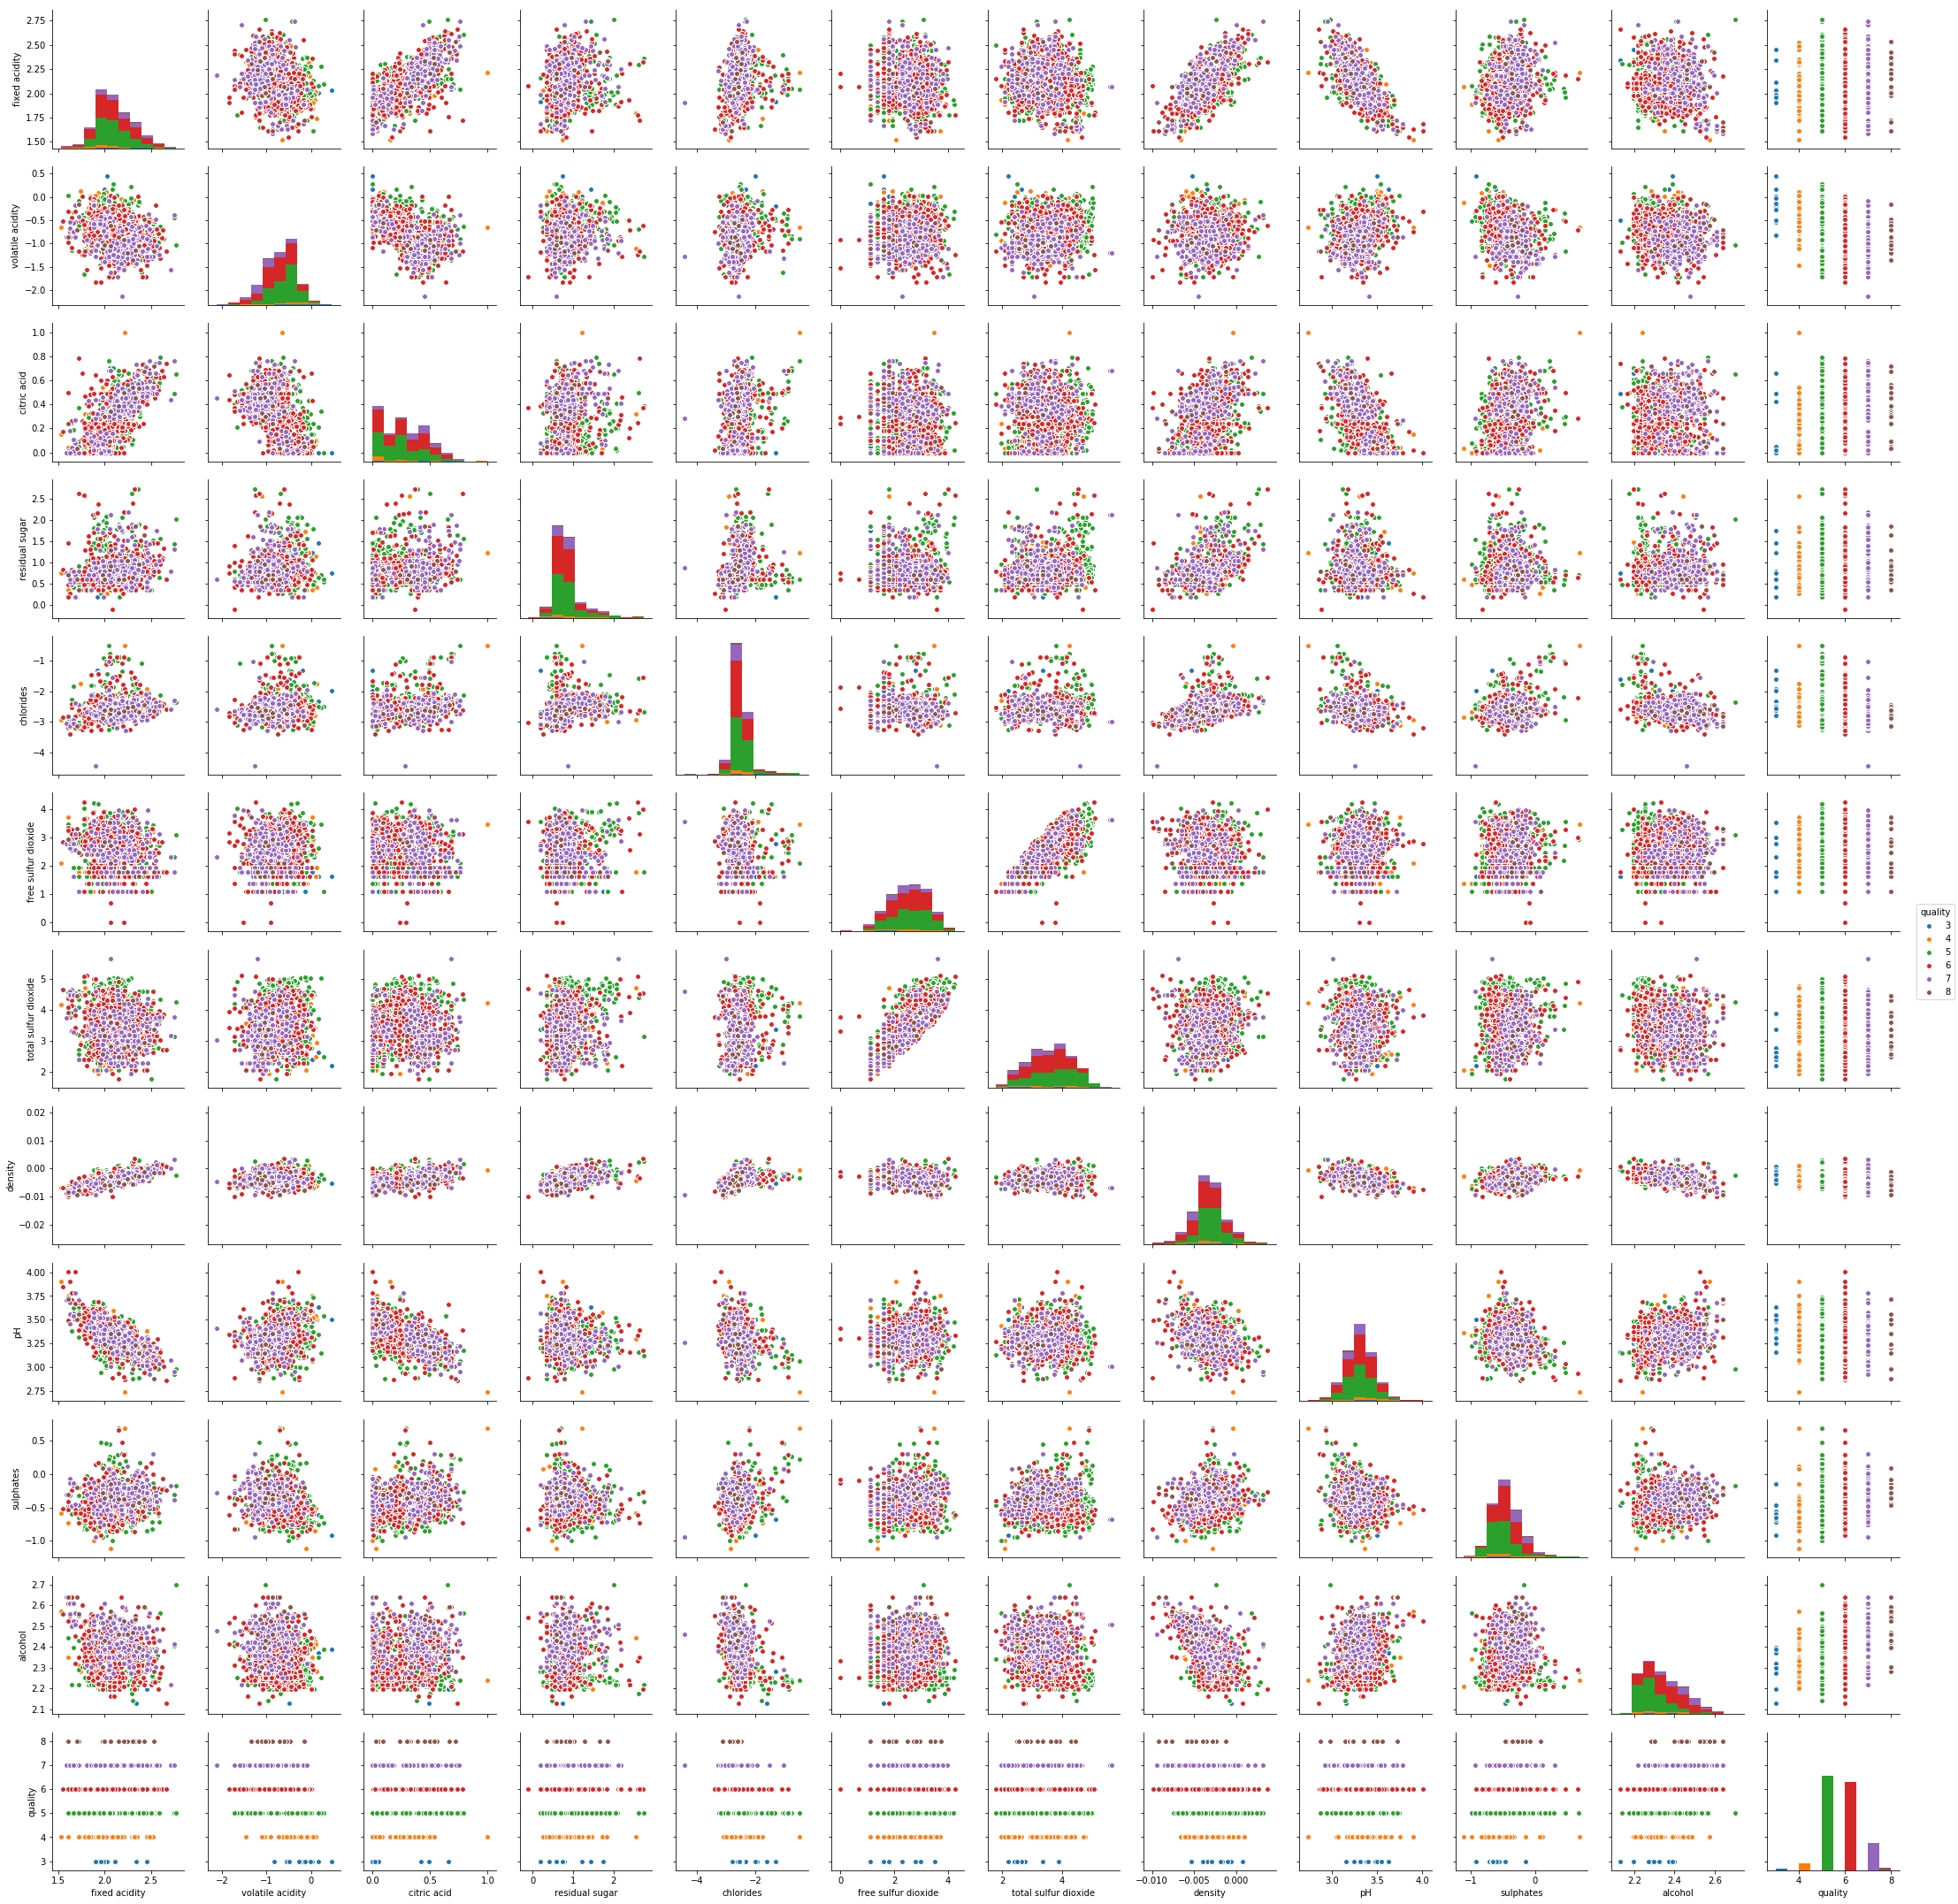

In [38]:
g = sns.pairplot(df2, hue="quality")

In [39]:
#主成分をとる
from sklearn.decomposition import PCA 

pca = PCA()

pc_x = pca.fit_transform(df2.drop(["quality"], axis=1).values)



In [49]:
df3 = pd.concat([pd.DataFrame(pc_x[:, pca.explained_variance_ratio_.cumsum()<0.96], index=df2.index,
                              columns=[f"PC_{i+1}" for i in range((pca.explained_variance_ratio_.cumsum()<0.96).sum())]),
                df2.loc[:, ['quality']]], axis=1)

In [50]:
df3

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6  quality
0     0.149211 -0.526830 -0.092296  0.074441  0.062064  0.041228        5
1    -0.932642 -0.362795 -0.404617  0.028329 -0.223693 -0.064394        5
2    -0.411109 -0.316660 -0.344269  0.129978  0.011514 -0.006362        5
3    -0.504194  0.509565  0.422612  0.227508  0.259428 -0.286365        6
4     0.149211 -0.526830 -0.092296  0.074441  0.062064  0.041228        5
5    -0.077580 -0.511019 -0.009501  0.115620  0.074879  0.038005        5
6    -0.437158 -0.454470  0.075875  0.229808  0.307869 -0.187713        5
7     0.316721 -0.786194  0.470588  0.142130 -0.266496 -0.226292        7
8     0.751921 -0.380195  0.087995 -0.077516 -0.153359 -0.033532        7
9    -0.993103  0.451282 -0.549030 -0.575938  0.439822  0.292363        5
10   -0.525145 -0.289510 -0.142015  0.358882  0.162442  0.060069        5
11   -0.993103  0.451282 -0.549030 -0.575938  0.439822  0.292363        5
12   -0.501553 -0.566297 -0.000886  0.305138  0.115835  0.251623        5
13    0.404226  0.061533 -0.121349  0.634868 -0.249534  0.368479        5
14   -2.009531  0.351854 -0.626839  0.152211 -0.518616  0.094975        5
15   -2.012522  0.373032 -0.631000  0.132409 -0.485762  0.123151        5
16   -1.403627  0.487896  0.496898  0.362648  0.010916  0.041558        7
17   -0.478354  0.436546 -0.668245  1.212596 -0.787029  0.400736        5
18    0.639735 -0.010849 -0.653485 -0.413971  0.267409  0.150696        4
19   -0.498911  0.844778 -0.324299  1.116217 -0.686562  0.372930        6
20   -0.872302  0.429837  0.766708  0.120013 -0.023442 -0.082241        6
21   -0.878424  0.116678  0.190897  0.045137  0.068206  0.158404        5
22    0.177416  0.128771  0.058825  0.551774 -0.013718  0.191788        5
23   -0.190556  0.023066 -0.294497  0.234153  0.565854 -0.026133        5
24   -0.411444 -0.008360  0.239932 -0.104841 -0.236912  0.181026        6
25    0.464652 -0.239500  0.466471  0.261722 -0.107939  0.106561        5
26    1.684490 -0.046798  0.148264  0.122216  0.030757  0.062305        5
27    0.177416  0.128771  0.058825  0.551774 -0.013718  0.191788        5
28   -0.040302 -0.549696 -0.052658  0.057531 -0.087463  0.015608        5
29    0.912320 -0.422486 -0.035680 -0.025386 -0.233036 -0.002310        6
...        ...       ...       ...       ...       ...       ...      ...
1569 -0.050380 -0.411146  0.370733 -0.156411  0.081788  0.113075        6
1570 -0.250105  0.528560 -0.096937  0.521875 -0.813988  0.475145        6
1571  0.176669 -0.242421  0.728727 -0.507833  0.116483  0.132174        6
1572 -1.454071 -0.343174  0.004086 -0.021309  0.111246 -0.215215        5
1573 -0.351489 -0.258576 -0.034770 -0.083015  0.106668  0.320255        6
1574 -1.158865  0.968773 -0.571261 -1.345723  0.301098  0.328000        6
1575  0.485023 -0.143694  0.302854 -0.250031 -0.151730 -0.109862        6
1576  0.052814  0.332857  0.639228  0.238064 -0.209844  0.023517        6
1577  0.140691 -0.175071 -0.436016 -0.786703 -0.209585  0.258423        6
1578  0.413997 -0.367706 -0.043948  0.199989 -0.592937  0.118616        6
1579 -0.329436 -0.590659  0.575215 -0.210299 -0.214836  0.055184        5
1580  0.500793  0.153559  0.261129 -0.155163  0.151875  0.129568        6
1581 -0.329436 -0.590659  0.575215 -0.210299 -0.214836  0.055184        5
1582  0.185610 -0.610141  0.060418 -0.492413  0.028702  0.062544        5
1583 -1.341819 -0.089557  0.224197  0.073026  0.111034  0.101778        5
1584 -0.370582  0.231247  0.643981 -0.283871 -0.234297  0.146997        7
1585 -0.569224  0.227143  0.337615 -0.191344 -0.057575  0.143286        6
1586 -1.017089  0.321000  0.604084 -0.171028 -0.148030  0.151751        6
1587 -0.048265 -0.547151  0.332945 -0.102349 -0.265098  0.185552        6
1588 -1.425689 -0.137603  0.005375 -0.078382  0.059889  0.011195        6
1589 -1.209094  0.042819 -0.683050 -0.986591 -0.031158  0.047188        5
1590 -0.457874 -0.301710  0.381543  0.019345 -0.452164  0.147199        6
1591  0.078420

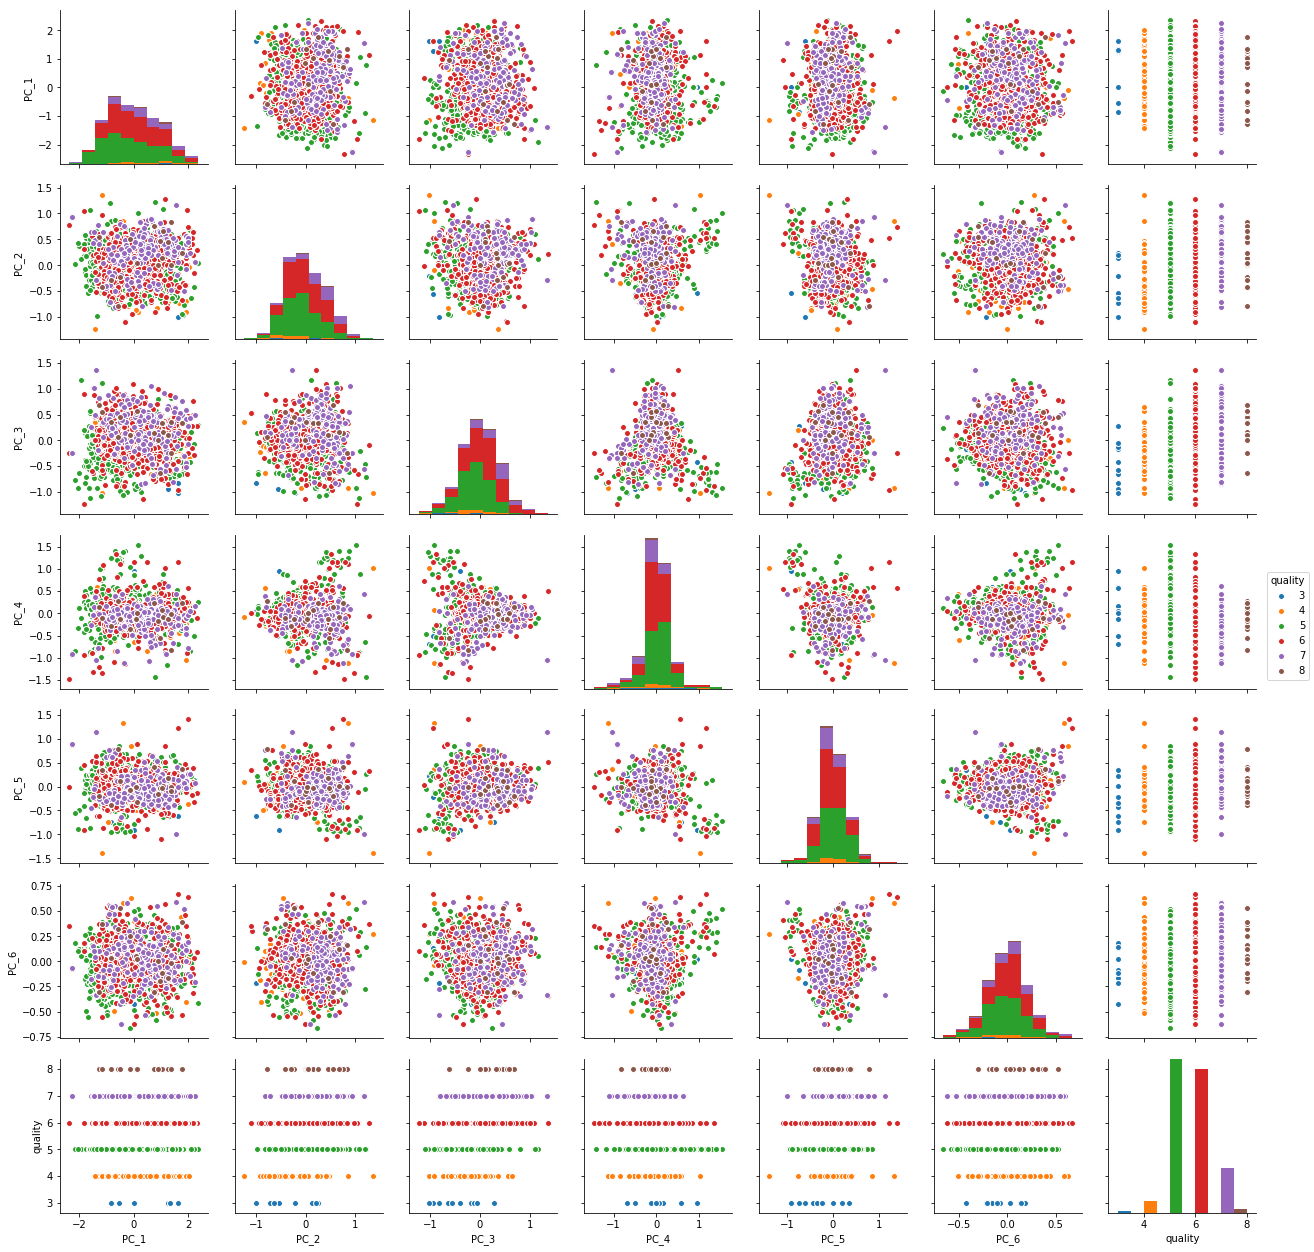

In [51]:
sns.pairplot(df3, hue="quality")

In [53]:
path1 = "../analysis/wine/log_data.csv"
path2 = "../analysis/wine/pc_data.csv"

df2.to_csv(path1, index=False)
df3.to_csv(path2, index=False)